In [ ]:
from tensorflow.keras.models import load_model

#model loading
model = load_model('drive/MyDrive/unet_segmentation_v2.keras')

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

In [7]:

images_path = '/content/drive/MyDrive/Phd/dataset/main'
annotations_path = '/content/drive/MyDrive/Phd/dataset/annotations'

input_height, input_width = 256, 256
num_classes = 2  # Background and brain

image_files = os.listdir(images_path)
annotation_files = os.listdir(annotations_path)

image_files.sort()
annotation_files.sort()

images = np.zeros((len(image_files), input_height, input_width, 3), dtype=np.float32)
annotations = np.zeros((len(annotation_files), input_height, input_width, 1), dtype=np.float32)

for i, (image_file, annotation_file) in enumerate(zip(image_files, annotation_files)):
    image_path = os.path.join(images_path, image_file)
    annotation_path = os.path.join(annotations_path, annotation_file)

    img = load_img(image_path, target_size=(input_height, input_width))
    images[i] = img_to_array(img) / 255.0

    annotation = load_img(annotation_path, target_size=(input_height, input_width), color_mode='grayscale')
    annotations[i] = img_to_array(annotation) / 255.0

X_train, X_temp, y_train, y_temp = train_test_split(images, annotations, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42)

In [8]:
predictions = model.predict(X_test)

4/4 [==============================] - 198s 46s/step


In [9]:
threshold = 0.5  # Adjust this threshold based on your model's output
binary_predictions = (predictions > threshold).astype(np.uint8)
y_true_flat = y_test.flatten()
y_pred_flat = binary_predictions.flatten()


In [10]:
from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(y_true_flat, y_pred_flat)
print(confusion_mat)



[[7142515    2118]
 [   3656   60671]]


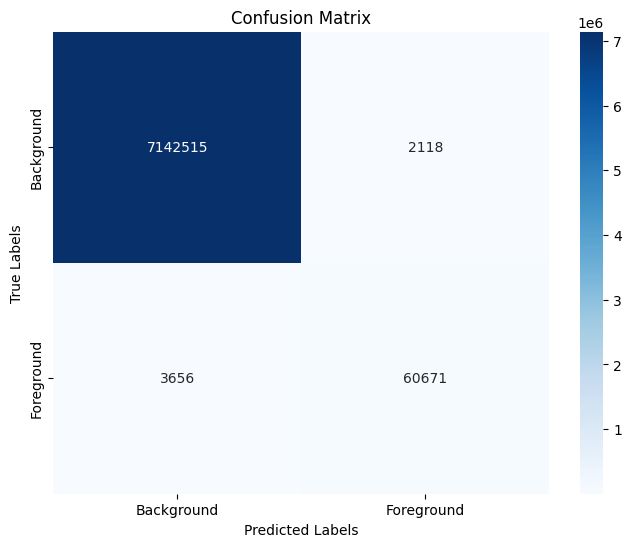

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Assuming y_true_flat and y_pred_flat are your flattened true and predicted binary masks
confusion_mat = confusion_matrix(y_true_flat, y_pred_flat)

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Background', 'Foreground'],
            yticklabels=['Background', 'Foreground'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



In [13]:
from sklearn.metrics import classification_report

print(classification_report(y_true_flat, y_pred_flat, target_names=['Background', 'Foreground']))


              precision    recall  f1-score   support

  Background       1.00      1.00      1.00   7144633
  Foreground       0.97      0.94      0.95     64327

    accuracy                           1.00   7208960
   macro avg       0.98      0.97      0.98   7208960
weighted avg       1.00      1.00      1.00   7208960



In [15]:
!pip install medpy

from medpy.metric.binary import hd95
import numpy as np

hd_95 = hd95(y_true_flat, y_pred_flat)

print(f'Hausdorff Distance 95 (HD95): {hd_95:.4f}')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.8/151.8 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 9.5 MB/s eta 0:00:00
  Created wheel for medpy: filename=MedPy-0.4.0-py3-none-any.whl size=214949 sha256=87b79a5ecd7eccf822354c3cf4e9590533c37cecae0d4716d686c9e97bd29b5b
  Stored in directory: /root/.cache/pip/wheels/d4/32/c7/6380ab2edb8cca018d39a0f1d43250fd9791922c963117de46
Successfully built medpy
Hausdorff Distance 95 (HD95): 3.0000


In [16]:
from sklearn.metrics import jaccard_score

voe = 1 - jaccard_score(y_true_flat, y_pred_flat)

print(f'Volume Overlap Error (VOE): {voe:.4f}')


Volume Overlap Error (VOE): 0.0869


In [17]:
from sklearn.metrics import f1_score

dice_coefficient = f1_score(y_true_flat, y_pred_flat)

print(f'Dice Coefficient: {dice_coefficient:.4f}')


Dice Coefficient: 0.9546
